In [ ]:
pip install pandas numpy matplotlib seaborn sklearn tensorflow transformers nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283838 sha256=aac688283b1c38352c3ed392ecae03f68201ca1a1a39ecd27b15de2f8d39f5d9
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install wordcloud


In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.6 MB/s eta 0:00:00


In [ ]:
pip install pandas numpy nltk

In [ ]:
pip install torch transformers

In [3]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import mutual_info_regression
from sklearn.utils import shuffle
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve, 
    auc
)
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, 
    Embedding, 
    LSTM, 
    SpatialDropout1D, 
    SimpleRNN, 
    Dropout, 
    Dense
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from scipy.stats import chi2_contingency
import seaborn as sns


In [ ]:
#since i am using google collab for this first phase
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Loading the data
df = pd.read_csv('/content/drive/MyDrive/software.csv')

# Let's see the first few rows of the DataFrame
df.head()

<ipython-input-4-3162ddc9e5fa>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/software.csv')


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN


In [ ]:
# Renaming Dataframes
df.rename(columns={'overall': 'star ratings', 'asin': 'productID'}, inplace=True)

# Selecting only the columns needed
df = df[['star ratings', 'reviewerID', 'productID', 'reviewText']]


In [ ]:
# Dropping null values in reviewText and star ratings column
df = df.dropna(subset=['reviewText', 'star ratings'])


df.head()

,star ratings,reviewerID,productID,reviewText
0,4.0,A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excell...
1,4.0,A1YCCU0YRLS0FE,0077613252,I am really enjoying this book with the worksh...
2,1.0,A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ..."
3,3.0,APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages...
4,5.0,A2JZTTBSLS1QXV,0077775473,I have used LearnSmart and can officially say ...


## Performing sentiment analysis and getting Polarity scores on ReviewText column

In [ ]:
MODEL = "textattack/bert-base-uncased-imdb"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

def get_sentiment(text):
    # Prepare the text data into suitable format
    inputs = tokenizer.encode_plus(text, return_tensors='pt', max_length=512, truncation=True)

    # Move inputs to the right device
    inputs = inputs.to(next(model.parameters()).device)

    # Get model outputs
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted result
    sentiment = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_score = sentiment[:, 1].item() - sentiment[:, 0].item()

    return sentiment_score

df['sentiment'] = df['reviewText'].apply(get_sentiment)


### Rescaling the sentiment polarity scores

In [ ]:
# Initializing a scaler
scaler = MinMaxScaler(feature_range=(1, 5))

# Fitting and transforming the 'sentiment' column and replace the existing one
df['sentiment'] = scaler.fit_transform(df['sentiment'].values.reshape(-1, 1))
df.head()

,star ratings,reviewerID,productID,reviewText,sentiment
0,4.0,A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excell...,1.001575
1,4.0,A1YCCU0YRLS0FE,0077613252,I am really enjoying this book with the worksh...,4.990735
2,1.0,A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",1.001266
3,3.0,APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages...,1.001885
4,5.0,A2JZTTBSLS1QXV,0077775473,I have used LearnSmart and can officially say ...,4.992636


In [ ]:
#rounding the polarity score to the nearest whole number
df['sentiment'] = df['sentiment'].round()
df.head()

,star ratings,reviewerID,productID,reviewText,sentiment
0,4.0,A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excell...,1.0
1,4.0,A1YCCU0YRLS0FE,0077613252,I am really enjoying this book with the worksh...,5.0
2,1.0,A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",1.0
3,3.0,APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages...,1.0
4,5.0,A2JZTTBSLS1QXV,0077775473,I have used LearnSmart and can officially say ...,5.0


### Analyzing the distribution of Rating and sentiment polarity scores

In [ ]:
print("Star Ratings Summary Statistics:")
print(df['star ratings'].describe())
print("\nSentiment Scores Summary Statistics:")
print(df['sentiment'].describe())

Star Ratings Summary Statistics:
count    459367.000000
mean          3.570032
std           1.626681
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: star ratings, dtype: float64

Sentiment Scores Summary Statistics:
count    459367.000000
mean          3.500241
std           1.804083
min           1.000000
25%           1.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: sentiment, dtype: float64


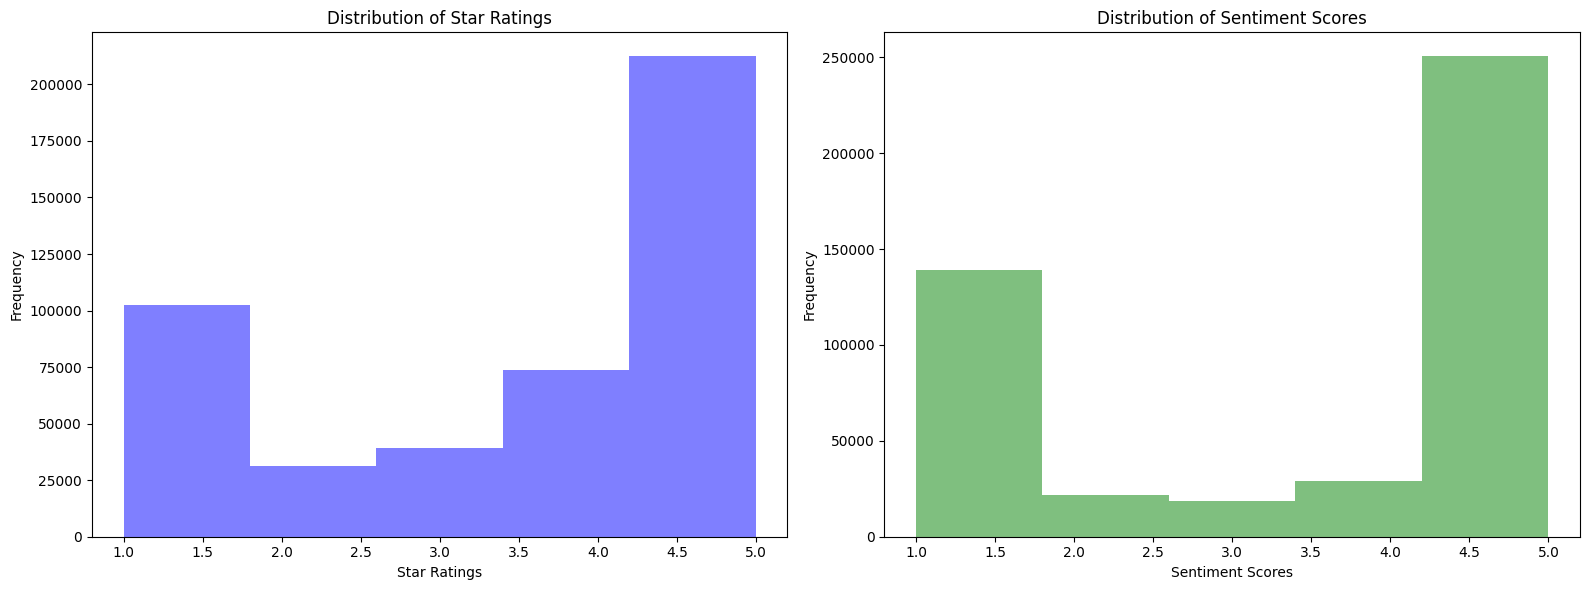

In [ ]:
# Create subplots for two histograms
fig, ax =plt.subplots(1,2, figsize=(16,6))

# Create a histogram of the 'star ratings' column
df['star ratings'].plot.hist(bins=5, alpha=0.5, ax=ax[0], color='blue')
ax[0].set_title('Distribution of Star Ratings')
ax[0].set_xlabel('Star Ratings')
ax[0].set_ylabel('Frequency')

# Create a histogram of the 'sentiment' column
df['sentiment'].plot.hist(bins=5, alpha=0.5, ax=ax[1], color='green')
ax[1].set_title('Distribution of Sentiment Scores')
ax[1].set_xlabel('Sentiment Scores')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate correlation
corr = df[['sentiment', 'star ratings']].corr(method='pearson')
print("Correlation between sentiment and star ratings: ", corr.loc['sentiment', 'star ratings'])

Correlation between sentiment and star ratings:  0.7500792994560468


### Checking the correlation significance

In [ ]:
# Converting sentiment and star ratings into categorical variables (as an example)
df['sentiment_category'] = pd.cut(df['sentiment'], bins=3, labels=['low', 'medium', 'high'])
df['star_ratings_category'] = pd.cut(df['star ratings'], bins=5, labels=[1, 2, 3, 4, 5])

contingency_table = pd.crosstab(df['sentiment_category'], df['star_ratings_category'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-squared:", chi2)
print("P-value:", p)

Chi-squared: 254699.57645732354
P-value: 0.0


**Dectecting Outliers**

In [ ]:
# Filtering rows where the 'star ratings' column has outliers
outliers_star_ratings = df[~df['star ratings'].between(1, 5)]

# Filtering rows where the 'sentiment' column has outliers
outliers_sentiment = df[~df['sentiment'].between(1, 5)]

# Displaying the outliers for 'star ratings'
if len(outliers_star_ratings) > 0:
    print("Outliers in 'star ratings':")
    print(outliers_star_ratings)
else:
    print("No outliers found in 'star ratings'.")

# Displaying the outliers for 'sentiment'
if len(outliers_sentiment) > 0:
    print("\nOutliers in 'sentiment':")
    print(outliers_sentiment)
else:
    print("No outliers found in 'sentiment'.")


No outliers found in 'star ratings'.
No outliers found in 'sentiment'.


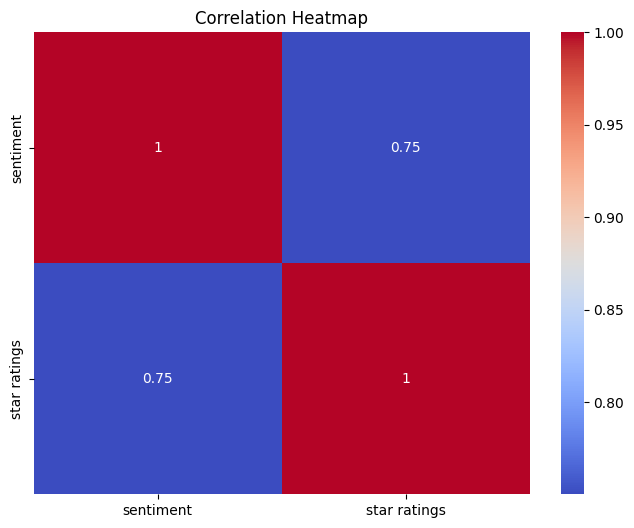

In [ ]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Specify the path to your Google Drive
path = "/content/drive/MyDrive/new_data.csv"

# Save the DataFrame
df.to_csv(path, index=False)

## Understanding Customer behaviour

In [9]:
# Load the new data
df = pd.read_csv('/content/drive/MyDrive/new_data.csv')

# Let's see the first few rows of the DataFrame
df.head()

,star ratings,reviewerID,productID,reviewText,sentiment
0,4.0,A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excell...,1.0
1,4.0,A1YCCU0YRLS0FE,0077613252,I am really enjoying this book with the worksh...,5.0
2,1.0,A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",1.0
3,3.0,APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages...,1.0
4,5.0,A2JZTTBSLS1QXV,0077775473,I have used LearnSmart and can officially say ...,5.0


In [10]:

lemmatizer = WordNetLemmatizer()

# Mapping NLTK's pos_tag outputs to WordNet's part of speech names
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if not found

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lemmatization
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in nltk.pos_tag(tokens)]
    return ' '.join(lemmatized)

# Applying preprocessing to reviewText column
df['reviewText'] = df['reviewText'].apply(preprocess_text)

# Creating a TF-IDF vectorizer object
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', min_df=5)

# Tokenizing and building vocab
tfidf_matrix = vectorizer.fit_transform(df['reviewText'])

# Converting the TF-IDF matrix into a DataFrame
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Adding 'star ratings' to the TF-IDF dataframe
tfidf_df['star ratings'] = df['star ratings'].values

# Separating positive and negative reviews
positive_reviews = tfidf_df[tfidf_df['star ratings'] >= 4]
negative_reviews = tfidf_df[tfidf_df['star ratings'] <= 2]

# Dropping the 'star ratings' column
positive_reviews = positive_reviews.drop(columns=['star ratings'])
negative_reviews = negative_reviews.drop(columns=['star ratings'])

# Summing up the TF-IDF scores for each word
positive_scores = positive_reviews.sum(axis=0)
negative_scores = negative_reviews.sum(axis=0)

# Geting top 100 words in positive and negative reviews
top_positive_words = positive_scores.sort_values(ascending=False).head(100)
top_negative_words = negative_scores.sort_values(ascending=False).head(100)



In [ ]:
# Specifying the path to your Google Drive
path = "/content/drive/MyDrive/preprocessed_data2.csv"

# Saving the DataFrame
df.to_csv(path, index=False)

**WORD CLOUD**

In [11]:
# Converting series to dataframe and reset index
top_positive_words_df = top_positive_words.reset_index()
top_positive_words_df.columns = ['Word', 'TF-IDF Score']
top_positive_words_df['Sentiment'] = 'Positive'

top_negative_words_df = top_negative_words.reset_index()
top_negative_words_df.columns = ['Word', 'TF-IDF Score']
top_negative_words_df['Sentiment'] = 'Negative'

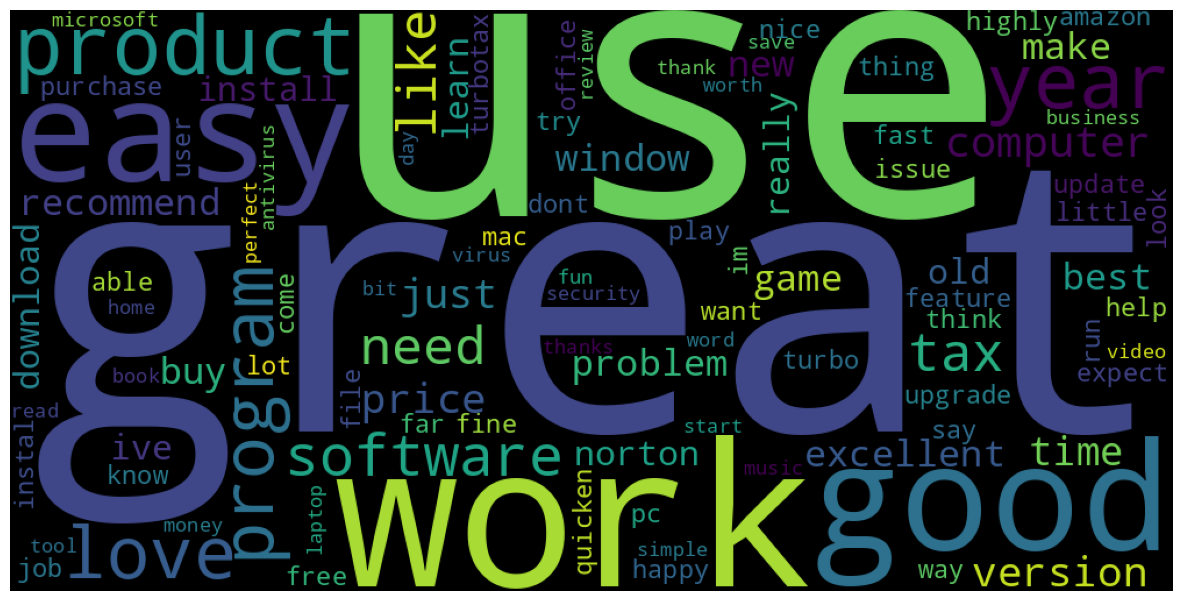

In [12]:
# top_positive_words is a pandas Series with words as index and scores as values
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(top_positive_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


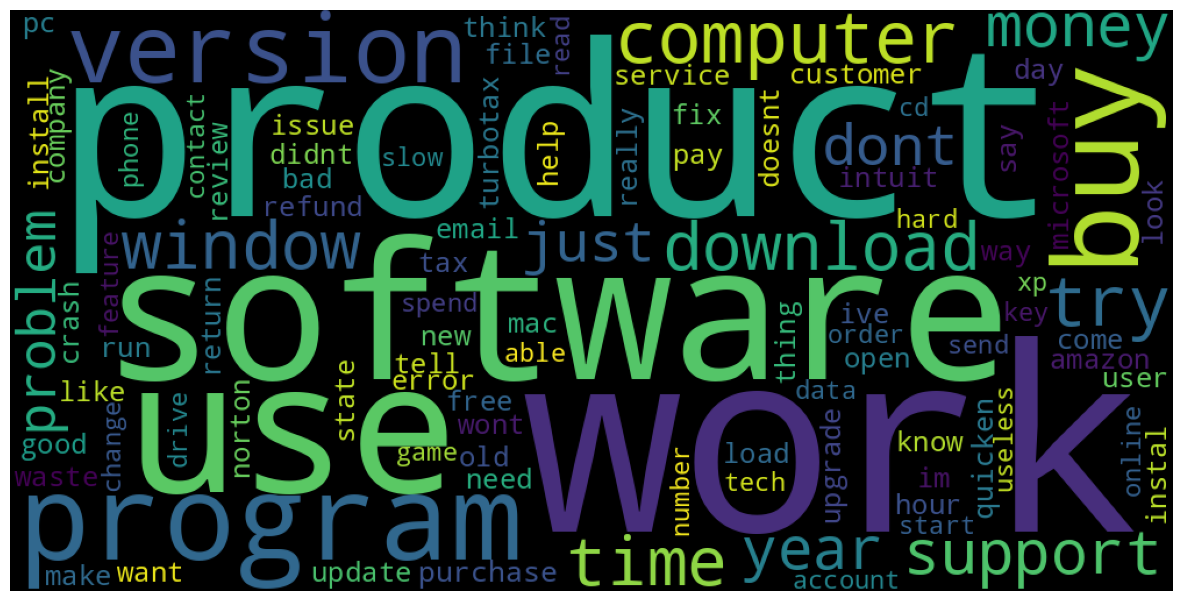

In [13]:
#top_negative_words is a pandas Series with words as index and scores as values
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(top_negative_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [14]:
# Geting top 10 words in positive and negative reviews
top_positive_words = positive_scores.sort_values(ascending=False).head(10)
top_negative_words = negative_scores.sort_values(ascending=False).head(10)

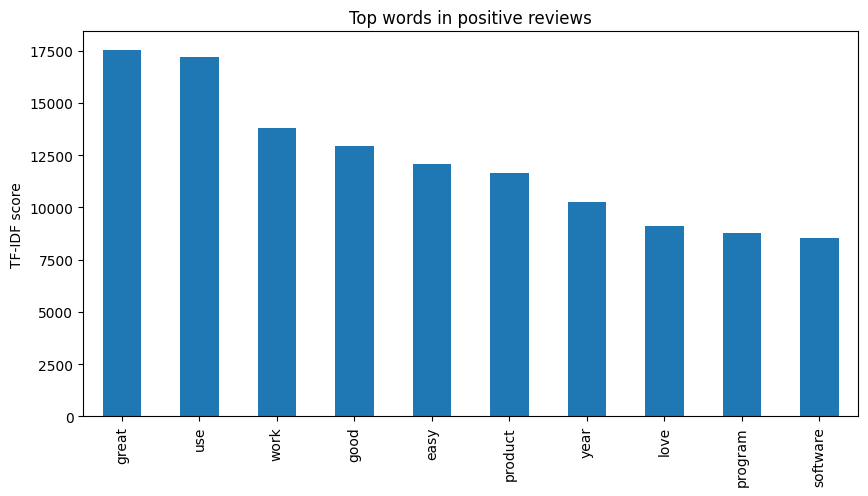

In [19]:
# Plotting top words for positive reviews
plt.figure(figsize=(10,5))
top_positive_words.plot(kind='bar')
plt.title('Top words in positive reviews')
plt.ylabel('TF-IDF score')
plt.show()


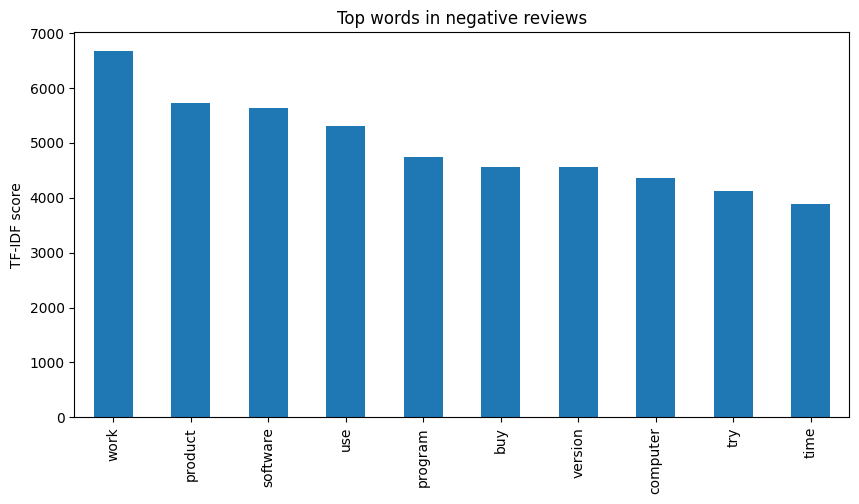

In [20]:
# Plotting top words for negative reviews
plt.figure(figsize=(10,5))
top_negative_words.plot(kind='bar')
plt.title('Top words in negative reviews')
plt.ylabel('TF-IDF score')
plt.show()

# BUILDING THE MODELS

In [ ]:
df = pd.read_csv("/Users/Odogwu/Desktop/project data/preprocessed_data2.csv")
df.head()

,star ratings,reviewerID,productID,reviewText,sentiment
0,4.0,A240ORQ2LF9LUI,0077613252,the material arrive early and be in excellent ...,1.0
1,4.0,A1YCCU0YRLS0FE,0077613252,i be really enjoy this book with the worksheet...,5.0
2,1.0,A1BJHRQDYVAY2J,0077613252,if you be take this class dont waste your mone...,1.0
3,3.0,APRDVZ6QBIQXT,0077613252,this book wa miss page important page i couldn...,1.0
4,5.0,A2JZTTBSLS1QXV,0077775473,i have use learnsmart and can officially say t...,5.0


## Building the Sentiment Models

### 1. Random forest

In [ ]:
# Sampling the dataframe
sample_size = 70000
df_sample = df.sample(n=sample_size, random_state=520)

# Handling potential NaN in 'reviewText' column before splitting
df_sample = df_sample.dropna(subset=['reviewText'])

# Splitting data
X = df_sample['reviewText']
y = df_sample['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Saving the sampled dataframe for consistent use
df_sample.to_csv('sampled_data.csv', index=False)

# Saving train and test data to ensure consistency
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [ ]:
# Converting y_train and y_test to binary based on your threshold.
rating_threshold = 4
y_train_binary = [1 if rating >= rating_threshold else 0 for rating in y_train]
y_test_binary = [1 if rating >= rating_threshold else 0 for rating in y_test]

# Vectorizing
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training with balanced class weights on binary data
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train_vec, y_train_binary)

# Getting predicted probabilities for the positive class.
y_pred_prob = clf.predict_proba(X_test_vec)[:, 1]

# Predicting class labels directly
y_pred_binary = clf.predict(X_test_vec)

# Evaluating Metrics
precision = precision_score(y_test_binary, y_pred_binary, zero_division=1)
recall = recall_score(y_test_binary, y_pred_binary, zero_division=1)
f1 = f1_score(y_test_binary, y_pred_binary, zero_division=1)
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.8525
Recall: 0.8578
F1 Score: 0.8551
Accuracy: 0.8221


In [ ]:
y_pred_prob = clf.predict_proba(X_test_vec)[:, 1]

#### Saving the output

In [ ]:
#Saving the output
df_rf_predictions = pd.DataFrame({
    'Actual': y_test_binary,
    'Predicted_RF_prob': y_pred_prob
})

df_rf_predictions.to_csv('sentiment_randomforest_predictions.csv', index=False)


#### Roc curve

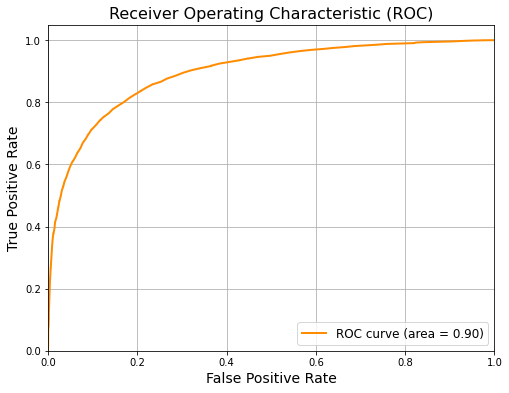

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

...

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)  # Optionally, you can add a grid for better readability
plt.show()

### RNN

In [ ]:
# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

X_train_rnn = X_train
y_train_rnn = y_train
X_test_rnn = X_test
y_test_rnn = y_test

In [ ]:
# Tokenizing and Padding for RNN
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_rnn)
X_train_rnn_sequences = tokenizer.texts_to_sequences(X_train_rnn)
X_train_rnn_padded = pad_sequences(X_train_rnn_sequences, maxlen=200)

X_test_rnn_sequences = tokenizer.texts_to_sequences(X_test_rnn)
X_test_rnn_padded = pad_sequences(X_test_rnn_sequences, maxlen=200)

# Convert ratings to binary for RNN
y_train_rnn_binary = np.array([1 if rating >= rating_threshold else 0 for rating in y_train_rnn])
y_test_rnn_binary = np.array([1 if rating >= rating_threshold else 0 for rating in y_test_rnn])


In [ ]:
# RNN Model
model = tf.keras.Sequential([
    Embedding(5000, 64, input_length=200),
    SimpleRNN(64, return_sequences=True, kernel_regularizer=l2(0.01)),  # kernel regularization
    Dropout(0.5),  # Dropout layer
    SimpleRNN(32, kernel_regularizer=l2(0.01)),  # kernel regularization
    Dense(1, activation='sigmoid')
])

# Custom learning rate
lr = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Adding patience
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train_rnn_padded, y_train_rnn_binary, epochs=15, validation_data=(X_test_rnn_padded, y_test_rnn_binary), callbacks=[early_stopping])

loss, accuracy_rnn = model.evaluate(X_test_rnn_padded, y_test_rnn_binary)
print(f'RNN Model - Accuracy: {accuracy_rnn}')


Epoch 1/15
1750/1750 [==============================] - 86s 49ms/step - loss: 0.7210 - accuracy: 0.6690 - val_loss: 0.5399 - val_accuracy: 0.7705
Epoch 2/15
1750/1750 [==============================] - 86s 49ms/step - loss: 0.5287 - accuracy: 0.7691 - val_loss: 0.4743 - val_accuracy: 0.7935
Epoch 3/15
1750/1750 [==============================] - 86s 49ms/step - loss: 0.4549 - accuracy: 0.8051 - val_loss: 0.4251 - val_accuracy: 0.8147
Epoch 4/15
1750/1750 [==============================] - 85s 49ms/step - loss: 0.4365 - accuracy: 0.8143 - val_loss: 0.4381 - val_accuracy: 0.8093
Epoch 5/15
1750/1750 [==============================] - 86s 49ms/step - loss: 0.4276 - accuracy: 0.8194 - val_loss: 0.4818 - val_accuracy: 0.7716
Epoch 6/15
438/438 [==============================] - 5s 10ms/step - loss: 0.4251 - accuracy: 0.8147
RNN Model - Accuracy: 0.8147143125534058


In [ ]:
# Getting predicted probabilities and predicted classes
y_pred_rnn_prob = model.predict(X_test_rnn_padded)
y_pred_rnn = [1 if prob >= 0.5 else 0 for prob in y_pred_rnn_prob]

438/438 [==============================] - 5s 10ms/step


In [ ]:
# Evaluation Metrics
precision_rnn = precision_score(y_test_rnn_binary, y_pred_rnn)
recall_rnn = recall_score(y_test_rnn_binary, y_pred_rnn)
f1_rnn = f1_score(y_test_rnn_binary, y_pred_rnn)
roc_auc_rnn = auc(*roc_curve(y_test_rnn_binary, y_pred_rnn_prob)[:2])

print(f"RNN Model - Precision: {precision_rnn:.4f}")
print(f"RNN Model - Recall: {recall_rnn:.4f}")
print(f"RNN Model - F1 Score: {f1_rnn:.4f}")
print(f"RNN Model - ROC AUC: {roc_auc_rnn:.4f}")

RNN Model - Precision: 0.8601
RNN Model - Recall: 0.8328
RNN Model - F1 Score: 0.8463
RNN Model - ROC AUC: 0.8904


### ROC curve

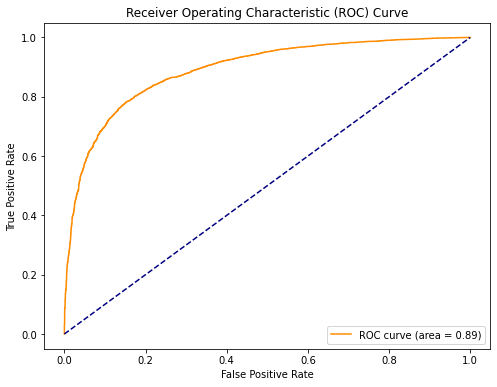

In [ ]:
fpr, tpr, _ = roc_curve(y_test_rnn_binary, y_pred_rnn_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc_rnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### saving the model's output

In [ ]:
# Ensuring both are 1-dimensional
y_test_rnn_binary = y_test_rnn_binary.ravel()
y_pred_rnn_prob = y_pred_rnn_prob.ravel()

# Creating the DataFrame
df_rnn_predictions = pd.DataFrame({
    'Actual': y_test_rnn_binary,
    'Predicted_RNN_prob': y_pred_rnn_prob
})

df_rnn_predictions.to_csv('Sentiment_rnn_predictions.csv', index=False)

# Building the Rating Models

### Logistic Regression

In [ ]:
df_sample = pd.read_csv('sampled_data.csv')

# Converting star ratings to binary sentiment based on threshold
threshold = 4
df_sample['binary_ratings'] = df_sample['star ratings'].apply(lambda x: 1 if x >= threshold else 0)

# Splitting data
X = df_sample['reviewText']
y = df_sample['binary_ratings']  # Using the binary representation as the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text representation using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limiting to 5000 most frequent words for simplicity
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model training
classifier = LogisticRegression(max_iter=1000)  # increased max_iter for better convergence
classifier.fit(X_train_tfidf, y_train)

# Making predictions
predictions = classifier.predict(X_test_tfidf)  # Use the transformed test data for predictions

# Calculating Metrics
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy on Test Data: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

Accuracy on Test Data: 0.8589

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      5287
           1       0.87      0.90      0.89      8713

    accuracy                           0.86     14000
   macro avg       0.85      0.84      0.85     14000
weighted avg       0.86      0.86      0.86     14000



In [ ]:
# Getting predicted probabilities for the positive class (class 1)
predicted_probabilities = classifier.predict_proba(X_test_tfidf)[:, 1]

# Creating a dataframe with the true labels, predicted labels, and predicted probabilities
output_df = pd.DataFrame({
    'True_Labels': y_test,
    'Predicted_Labels': predictions,
    'Predicted_Probabilities': predicted_probabilities
})

# Saving to CSV
output_df.to_csv('Ratings_logistic_predictions.csv', index=False)


#### ROC and Auc

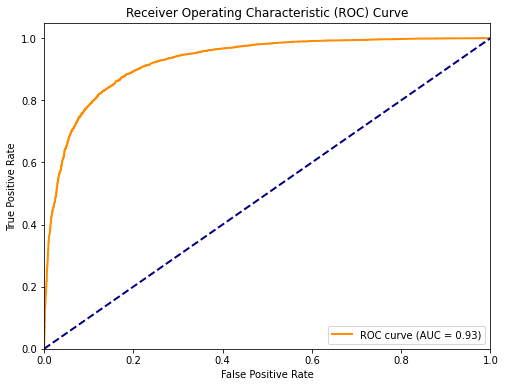

In [ ]:

# Computing ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## RNN

In [ ]:

# Loading the data
df_sample = pd.read_csv('sampled_data.csv')

# Converting star ratings to binary labels based on the threshold
threshold = 4
df_sample['binary_ratings'] = df_sample['star ratings'].apply(lambda x: 1 if x >= threshold else 0)

# Splitting data
X = df_sample['reviewText']
y = df_sample['binary_ratings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizing the texts into sequences
max_words = 5000  # considering only top 5000 words in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
maxlen = 50  # considering only first 100 words of each review
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

embedding_dim = 50  # dimensions for the word embedding

# RNN model definition
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(SimpleRNN(512, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Adding dropout with dropout rate of 0.5
model.add(Dense(1, activation='sigmoid'))  # binary classification

# Setting up the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# For early stopping with patience
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 50, 50)            250000    
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 512)               288256    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 538,769
Trainable params: 538,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_pad, y_train, epochs=17, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/17
1400/1400 [==============================] - 142s 101ms/step - loss: 1.3264 - acc: 0.6381 - val_loss: 0.4842 - val_acc: 0.7949
Epoch 2/17
1400/1400 [==============================] - 142s 102ms/step - loss: 0.5009 - acc: 0.8011 - val_loss: 0.4525 - val_acc: 0.8094
Epoch 3/17
1400/1400 [==============================] - 142s 102ms/step - loss: 0.4339 - acc: 0.8263 - val_loss: 0.4041 - val_acc: 0.8380
Epoch 4/17
1400/1400 [==============================] - 144s 103ms/step - loss: 0.4197 - acc: 0.8325 - val_loss: 0.4002 - val_acc: 0.8368
Epoch 5/17
1400/1400 [==============================] - 142s 101ms/step - loss: 0.5113 - acc: 0.8068 - val_loss: 0.4462 - val_acc: 0.8113
Epoch 6/17
1400/1400 [==============================] - 143s 102ms/step - loss: 0.4123 - acc: 0.8365 - val_loss: 0.4004 - val_acc: 0.8330
Epoch 7/17
1400/1400 [==============================] - 143s 102ms/step - loss: 0.4082 - acc: 0.8407 - val_loss: 0.3939 - val_acc: 0.8351
Epoch 8/17
1400/1400 [============

#### Predicting and Evaluating Metrics

In [ ]:

# Making predictions
predictions_prob = model.predict(X_test_pad)
predictions = (predictions_prob > 0.5).astype(int).flatten()  # Convert probabilities to class labels

# Evaluation
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy:.4f}")
print("\nClassification Report:")
print(report)


438/438 [==============================] - 15s 34ms/step
Accuracy on Test Data: 0.8366

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      5287
           1       0.86      0.89      0.87      8713

    accuracy                           0.84     14000
   macro avg       0.83      0.82      0.82     14000
weighted avg       0.84      0.84      0.84     14000



In [ ]:
# Saving the Predictions
output_df = pd.DataFrame({
    'True_Labels': y_test,
    'Predicted_Labels': predictions,
    'Predicted_Probabilities': predictions_prob.flatten()
})
output_df.to_csv('Ratings_rnn_predictions_output.csv', index=False)

#### ROC curve

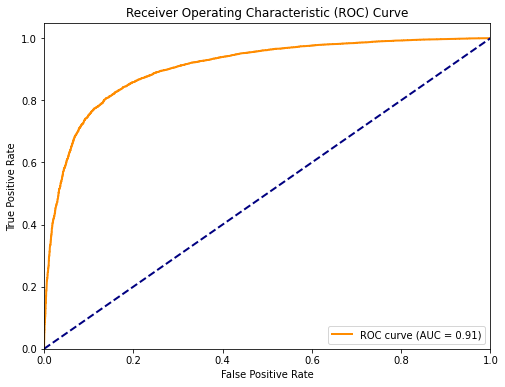

In [ ]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Weighted Hybrid Approach (Linear Combination)

#### 1. Random forest (Sentiment) & Logistic Regression (Ratings)

In [ ]:
# Loading the outputs
df_sentiment = pd.read_csv('sentiment_randomforest_predictions.csv')
df_ratings = pd.read_csv('Ratings_logistic_predictions.csv')

In [ ]:
# Just for clarity, let's print the first few rows of each dataframe
print("Sentiment Predictions:")
print(df_sentiment.head())
print("\nRatings Predictions:")
print(df_ratings.head())

Sentiment Predictions:
   Actual  Predicted_RF_prob
0       1               0.45
1       0               0.49
2       1               0.93
3       0               0.45
4       1               0.65

Ratings Predictions:
   True_Labels  Predicted_Labels  Predicted_Probabilities
0            1                 1                 0.735379
1            1                 0                 0.317936
2            1                 1                 0.998853
3            0                 0                 0.272287
4            1                 0                 0.180045


In [ ]:
# Merging them based on the index 
df_hybrid = pd.merge(df_sentiment, df_ratings, left_index=True, right_index=True)

In [ ]:
# Defining the weight range
weight_range = [i/10 for i in range(11)]

best_auc = 0
best_weight = None
metrics_dict = {}

for weight in weight_range:
    # Calculating the weighted score
    df_hybrid['Weighted_Score'] = weight * df_hybrid['Predicted_RF_prob'] + (1 - weight) * df_hybrid['Predicted_Probabilities']

    # Converting the weighted score to binary prediction
    threshold = 0.5  # you can adjust this threshold based on your requirement
    df_hybrid['Weighted_Predictions'] = (df_hybrid['Weighted_Score'] >= threshold).astype(int)

    # Calculating AUC
    auc = roc_auc_score(df_hybrid['True_Labels'], df_hybrid['Weighted_Score'])

    # Updating best AUC
    if auc > best_auc:
        best_auc = auc
        best_weight = weight

    # Printing metrics
    print(f"\nMetrics for Weight {weight} for Sentiment and {1 - weight} for Ratings:")
    print(classification_report(df_hybrid['True_Labels'], df_hybrid['Weighted_Predictions']))
    print(f"AUC: {auc:.4f}")

    metrics_dict[weight] = {
        'AUC': auc,
        'Classification Report': classification_report(df_hybrid['True_Labels'], df_hybrid['Weighted_Predictions'])
    }

print(f"\nBest AUC was {best_auc:.4f} with a weight of {best_weight} for sentiment and {1 - best_weight} for ratings.")



Metrics for Weight 0.0 for Sentiment and 1.0 for Ratings:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      5287
           1       0.87      0.90      0.89      8713

    accuracy                           0.86     14000
   macro avg       0.85      0.84      0.85     14000
weighted avg       0.86      0.86      0.86     14000

AUC: 0.9264

Metrics for Weight 0.1 for Sentiment and 0.9 for Ratings:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      5287
           1       0.88      0.91      0.89      8713

    accuracy                           0.86     14000
   macro avg       0.86      0.85      0.85     14000
weighted avg       0.86      0.86      0.86     14000

AUC: 0.9290

Metrics for Weight 0.2 for Sentiment and 0.8 for Ratings:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      5287
           1       0.88      0.91   

### ROC curve

<Figure size 432x288 with 0 Axes>

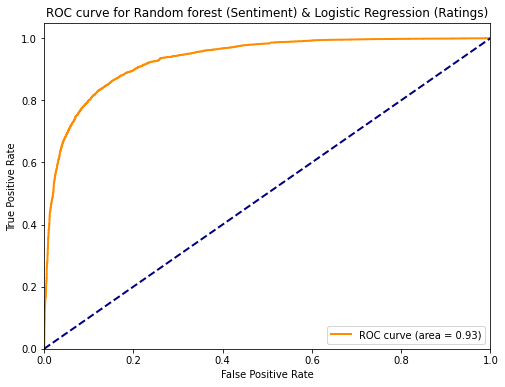

In [ ]:

# For the best weight:
df_hybrid['Weighted_Score'] = best_weight * df_hybrid['Predicted_RF_prob'] + (1 - best_weight) * df_hybrid['Predicted_Probabilities']

# Computing ROC curve and AUC
fpr, tpr, thresholds = roc_curve(df_hybrid['True_Labels'], df_hybrid['Weighted_Score'])
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
lw = 2
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random forest (Sentiment) & Logistic Regression (Ratings)')
plt.legend(loc="lower right")
plt.show()


#### 2. RNN (Sentiment model) & RNN (Ratings model)

In [ ]:

# Reading the prediction files
df_ratings = pd.read_csv('Ratings_rnn_predictions_output.csv')
df_sentiment = pd.read_csv('Sentiment_rnn_predictions.csv')

# Merging the dataframes based on their index
merged_df = pd.merge(df_ratings, df_sentiment, left_index=True, right_index=True)

true_labels = merged_df['True_Labels']

# Creating a function to evaluate the hybrid model
def evaluate_hybrid(weight_ratings_rnn, weight_sentiment_rnn, true_labels, ratings_probs, sentiment_probs):
    hybrid_probs = weight_ratings_rnn * ratings_probs + weight_sentiment_rnn * sentiment_probs
    threshold = 0.5
    hybrid_predictions = (hybrid_probs > threshold).astype(int)

    precision = precision_score(true_labels, hybrid_predictions, zero_division=1)
    recall = recall_score(true_labels, hybrid_predictions, zero_division=1)
    f1 = f1_score(true_labels, hybrid_predictions, zero_division=1)
    auc = roc_auc_score(true_labels, hybrid_probs)
    accuracy = accuracy_score(true_labels, hybrid_predictions)  # Calculate accuracy

    return precision, recall, f1, auc, accuracy  # Include accuracy in return statement

# Iterating over different weights and evaluate
steps = 10
results = []

for i in range(steps+1):
    weight_ratings_rnn = i/steps
    weight_sentiment_rnn = 1 - weight_ratings_rnn
    precision, recall, f1, auc, accuracy = evaluate_hybrid(weight_ratings_rnn, weight_sentiment_rnn, true_labels,  # Include accuracy in unpacking
                                                           merged_df['Predicted_Probabilities'], merged_df['Predicted_RNN_prob'])
    results.append({
        'W_Sentiment_RNN': weight_sentiment_rnn,
        'W_Ratings_RNN': weight_ratings_rnn,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': auc,
        'Accuracy': accuracy  # Include accuracy in results dictionary
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='ROC-AUC', ascending=False)  # Sorting by ROC-AUC in descending order
print(results_df)

# Printing the best ROC-AUC and corresponding weights
print("\nBest ROC-AUC:", results_df.iloc[0]['ROC-AUC'])
print("Best Accuracy:", results_df.iloc[0]['Accuracy'])  # Print the best accuracy
print("Corresponding Weight for Ratings RNN:", results_df.iloc[0]['W_Ratings_RNN'])
print("Corresponding Weight for Sentiment RNN:", results_df.iloc[0]['W_Sentiment_RNN'])


    W_Sentiment_RNN  W_Ratings_RNN  Precision    Recall        F1   ROC-AUC  \
6               0.4            0.6   0.869100  0.877080  0.873072  0.911657   
5               0.5            0.5   0.872279  0.873981  0.873130  0.911394   
7               0.3            0.7   0.865862  0.880868  0.873300  0.911336   
4               0.6            0.4   0.874293  0.869276  0.871777  0.910583   
8               0.2            0.8   0.861671  0.882934  0.872173  0.910423   
3               0.7            0.3   0.876911  0.862619  0.869706  0.909219   
9               0.1            0.9   0.859612  0.884770  0.872010  0.908763   
2               0.8            0.2   0.879872  0.852404  0.865920  0.907253   
10              0.0            1.0   0.856509  0.885803  0.870910  0.906036   
1               0.9            0.1   0.880463  0.846207  0.862995  0.904610   
0               1.0            0.0   0.881205  0.839435  0.859813  0.901147   

    Accuracy  
6   0.841286  
5   0.841929  
7   0.

### ROC curve

<Figure size 432x288 with 0 Axes>

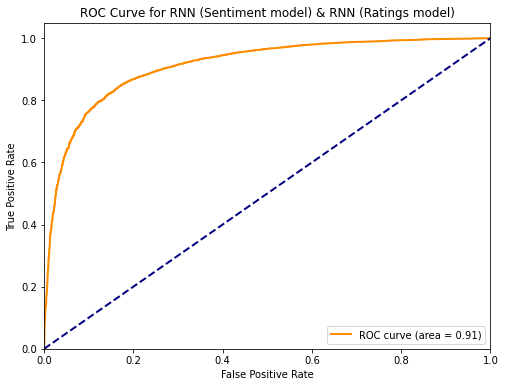

In [ ]:

# Finding the row with the highest AUC
best_auc_row = results_df[results_df['ROC-AUC'] == results_df['ROC-AUC'].max()].iloc[0]

# For the best weight:
best_weight_ratings_rnn = best_auc_row['W_Ratings_RNN']
best_weight_sentiment_rnn = best_auc_row['W_Sentiment_RNN']

merged_df['Best_Weighted_Score'] = best_weight_ratings_rnn * merged_df['Predicted_Probabilities'] + best_weight_sentiment_rnn * merged_df['Predicted_RNN_prob']

# Computing ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, merged_df['Best_Weighted_Score'])
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
lw = 2
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RNN (Sentiment model) & RNN (Ratings model)')
plt.legend(loc="lower right")
plt.show()


### 3. Sentiment model (Random forest) and Ratings model (RNN)

In [ ]:

# Reading the prediction files
df_rf = pd.read_csv('sentiment_randomforest_predictions.csv')
df_rnn = pd.read_csv('Ratings_rnn_predictions_output.csv')

# Merging the dataframes based on their index
merged_df = pd.merge(df_rf, df_rnn, left_index=True, right_index=True)

true_labels = merged_df['True_Labels']

# Creating a function to evaluate the hybrid model
def evaluate_hybrid(weight_rf, weight_rnn, true_labels, rf_probs, rnn_probs):
    hybrid_probs = weight_rf * rf_probs + weight_rnn * rnn_probs
    threshold = 0.5
    hybrid_predictions = (hybrid_probs > threshold).astype(int)

    precision = precision_score(true_labels, hybrid_predictions, zero_division=1)
    recall = recall_score(true_labels, hybrid_predictions, zero_division=1)
    f1 = f1_score(true_labels, hybrid_predictions, zero_division=1)
    auc = roc_auc_score(true_labels, hybrid_probs)
    accuracy = accuracy_score(true_labels, hybrid_predictions)  # Calculate accuracy

    return precision, recall, f1, auc, accuracy  # Include accuracy in the return statement

# Iterating over different weights and evaluate
steps = 10
results = []

for i in range(steps+1):
    weight_rf = i/steps
    weight_rnn = 1 - weight_rf
    precision, recall, f1, auc, accuracy = evaluate_hybrid(weight_rf, weight_rnn, true_labels,
                                                           merged_df['Predicted_RF_prob'], merged_df['Predicted_Probabilities'])
    results.append({
        'Weight_RF': weight_rf,
        'Weight_RNN': weight_rnn,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': auc,
        'Accuracy': accuracy  # Include accuracy in the results dictionary
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='ROC-AUC', ascending=False))

# Displaying the best AUC and corresponding weights
best_auc_row = results_df.sort_values(by='ROC-AUC', ascending=False).iloc[0]
print("\nBest ROC-AUC:", best_auc_row['ROC-AUC'])
print("Best Accuracy:", best_auc_row['Accuracy'])  # Print the best accuracy
print("Corresponding Weight for RandomForest:", best_auc_row['Weight_RF'])
print("Corresponding Weight for RNN:", best_auc_row['Weight_RNN'])


    Weight_RF  Weight_RNN  Precision    Recall        F1   ROC-AUC  Accuracy
5         0.5         0.5   0.872111  0.883622  0.877829  0.921110  0.846929
4         0.4         0.6   0.868696  0.887639  0.878065  0.920355  0.846571
6         0.6         0.4   0.873164  0.880179  0.876658  0.920233  0.845857
3         0.3         0.7   0.864689  0.886721  0.875567  0.918460  0.843143
7         0.7         0.3   0.872906  0.878917  0.875901  0.916816  0.845000
2         0.2         0.8   0.861885  0.888098  0.874795  0.915645  0.841786
1         0.1         0.9   0.859495  0.886721  0.872896  0.911746  0.839286
8         0.8         0.2   0.869878  0.874670  0.872267  0.910859  0.840571
0         0.0         1.0   0.856509  0.885803  0.870910  0.906036  0.836571
9         0.9         0.1   0.864339  0.866521  0.865429  0.902654  0.832286
10        1.0         0.0   0.861565  0.852864  0.857192  0.891472  0.823143

Best ROC-AUC: 0.921110480392638
Best Accuracy: 0.8469285714285715
Correspon

### ROC Curve

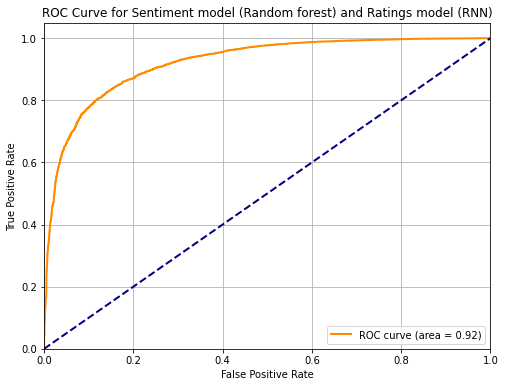

In [ ]:

# Calculating ROC curve for the best weights (you can change this if needed)
best_weight_rf = best_auc_row['Weight_RF']
best_weight_rnn = best_auc_row['Weight_RNN']
best_hybrid_probs = best_weight_rf * merged_df['Predicted_RF_prob'] + best_weight_rnn * merged_df['Predicted_Probabilities']
fpr, tpr, thresholds = roc_curve(true_labels, best_hybrid_probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Sentiment model (Random forest) and Ratings model (RNN)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 4. Sentiment model (RNN) and Ratings model (Logistic regression)

In [ ]:

# Reading the prediction files
df_rnn = pd.read_csv('Sentiment_rnn_predictions.csv')
df_lg = pd.read_csv('Ratings_random_F_predictions.csv') #Ratings_logistic_predictions

# Ensuring that the length of both dataframes is the same
assert len(df_rnn) == len(df_lg), "Mismatched lengths between dataframes."

# Merging the dataframes based on their index
merged_df = pd.merge(df_rnn, df_lg, left_index=True, right_index=True)

true_labels = merged_df['True_Labels']

# Creating a function to evaluate the hybrid model
def evaluate_hybrid(weight_lg, weight_rnn, true_labels, lg_probs, rnn_probs):
    hybrid_probs = weight_lg * lg_probs + weight_rnn * rnn_probs
    threshold = 0.5
    hybrid_predictions = (hybrid_probs > threshold).astype(int)

    precision = precision_score(true_labels, hybrid_predictions, zero_division=1)
    recall = recall_score(true_labels, hybrid_predictions, zero_division=1)
    f1 = f1_score(true_labels, hybrid_predictions, zero_division=1)
    auc = roc_auc_score(true_labels, hybrid_probs)
    accuracy = accuracy_score(true_labels, hybrid_predictions)  # Added accuracy calculation

    return precision, recall, f1, auc, accuracy  # Added accuracy to return statement

# Iterating over different weights and evaluate
steps = 10
results = []

for i in range(steps+1):
    weight_lg = i/steps
    weight_rnn = 1 - weight_lg
    precision, recall, f1, auc, accuracy = evaluate_hybrid(weight_lg, weight_rnn, true_labels,  # Modified to capture accuracy
                                                           merged_df['Predicted_Probabilities'], merged_df['Predicted_RNN_prob'])
    results.append({
        'Weight_lg': weight_lg,
        'Weight_RNN': weight_rnn,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': auc,
        'Accuracy': accuracy  # Added accuracy to the results dictionary
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='ROC-AUC', ascending=False))

# Displaying the best AUC and corresponding weights
best_auc_row = results_df.sort_values(by='ROC-AUC', ascending=False).iloc[0]
print("\nBest ROC-AUC:", best_auc_row['ROC-AUC'])
print("Corresponding Weight for RandomForest:", best_auc_row['Weight_lg'])
print("Corresponding Weight for RNN:", best_auc_row['Weight_RNN'])


    Weight_lg  Weight_RNN  Precision    Recall        F1   ROC-AUC  Accuracy
7         0.7         0.3   0.883435  0.898542  0.890925  0.932319  0.863071
6         0.6         0.4   0.887838  0.893952  0.890884  0.931948  0.863714
8         0.8         0.2   0.881501  0.900723  0.891008  0.931495  0.862857
5         0.5         0.5   0.889170  0.886721  0.887944  0.930353  0.860714
9         0.9         0.1   0.877160  0.903133  0.889957  0.929515  0.861000
4         0.4         0.6   0.888127  0.876506  0.882278  0.927482  0.854429
10        1.0         0.0   0.873752  0.903937  0.888588  0.926379  0.858929
3         0.3         0.7   0.887425  0.865833  0.876496  0.923346  0.848143
2         0.2         0.8   0.886126  0.854700  0.870129  0.917790  0.841214
1         0.1         0.9   0.883579  0.846666  0.864729  0.910658  0.835143
0         0.0         1.0   0.881205  0.839435  0.859813  0.901147  0.829643

Best ROC-AUC: 0.9323189125532656
Corresponding Weight for RandomForest: 0.7

### ROC Curve

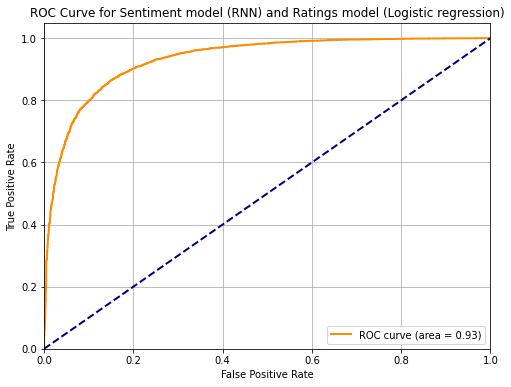

In [ ]:

# Calculating ROC curve for the best weights (you can change this if needed)
best_weight_lg = best_auc_row['Weight_lg']
best_weight_rnn = best_auc_row['Weight_RNN']
best_hybrid_probs = best_weight_lg * merged_df['Predicted_Probabilities'] + best_weight_rnn * merged_df['Predicted_RNN_prob']
fpr, tpr, thresholds = roc_curve(true_labels, best_hybrid_probs)
roc_auc = auc(fpr, tpr)

# Ploting ROC curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Sentiment model (RNN) and Ratings model (Logistic regression)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### BEST MODEL PLOT 

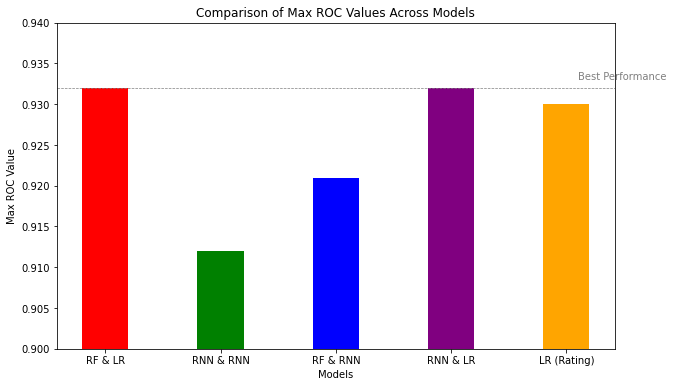

In [6]:

#Preparing the data
models = ["RF & LR", "RNN & RNN", "RF & RNN", "RNN & LR", "LR (Rating)"]
roc_values = [0.932, 0.912, 0.921, 0.932, 0.93]
colors = ['red', 'green', 'blue', 'purple', 'orange']

#Creating the bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(models, roc_values, color=colors, width=0.4)

#Adding title and labels
plt.title('Comparison of Max ROC Values Across Models')
plt.xlabel('Models')
plt.ylabel('Max ROC Value')

#Adjusting y-axis limits to zoom in
plt.ylim(0.90, 0.94)

#Adding horizontal line to highlight the best performance
plt.axhline(y=max(roc_values), color='gray', linestyle='--', linewidth=0.7)
plt.text(4.1, max(roc_values) + 0.001, 'Best Performance', color='gray')

plt.show()